<a href="https://colab.research.google.com/github/leo-aguiar/Classificador-De-Noticias-RegLog/blob/main/Case_Classificador_De_Noticias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# O projeto desenvolvido tem como objetivo classificar automaticamente os conteúdos da NZN, uma produtora de grandes sites de notícias
# como TecMundo e Mega Curioso, em duas categorias:

# -> Hard News: Notícias atuais que têm um interesse passageiro, com relevância por um curto período.
# -> Evergreen: Conteúdos que mantêm o interesse do público por um longo tempo, atraindo leitores continuamente.

# Para isso foram utilizadas técnicas de machine learning e análise de dados, a partir de dados armazenados em duas tabelas relacionais.

In [ ]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carregar dataset
df_dbo_materias = pd.read_csv('dbo_materias.csv', encoding='ISO-8859-1', sep = ';')
df_dbo_views = pd.read_csv('dbo_views.csv', encoding='ISO-8859-1', sep = ';')

In [ ]:
# Exibe as primeiras linhas do DataFrame
df_dbo_materias.head()

,codmateria,data_pub,titulo,autor,tag,publieditorial,possuilinkafiliacao,tipo
0,116360,2020-11-06 14:13:24.573,Entenda o que é ransomware: o malware que sequ...,547,Segurança,0,0,Hard News
1,124744,2020-11-25 09:51:44.880,Cashback: o que é e como funciona esse método ...,632,Mercado,0,0,Hard News
2,129678,2020-11-04 00:00:00.000,Associação consegue liminar que restringe aume...,523,Mercado,0,0,Hard News
3,134805,2020-11-06 14:02:08.347,A história da urna eletrônica e das eleições n...,128,Mercado,0,0,Hard News
4,137827,2021-01-19 16:45:14.100,Não gosta e quer passar longe? Aprenda como ev...,759,Software,0,0,Hard News


In [ ]:
# Exibe as primeiras linhas do DataFrame
df_dbo_views.head()

,ï»¿data_audiencia,codmateria,audiencia
0,01/10/2020,138347,658
1,01/10/2020,124744,51
2,01/10/2020,204589,15514
3,01/10/2020,134805,12
4,01/10/2020,204581,1470


In [ ]:
# Informações sobre o DataFrame
df_dbo_materias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   codmateria           281 non-null    int64 
 1   data_pub             281 non-null    object
 2   titulo               281 non-null    object
 3   autor                281 non-null    int64 
 4   tag                  281 non-null    object
 5   publieditorial       281 non-null    int64 
 6   possuilinkafiliacao  281 non-null    int64 
 7   tipo                 281 non-null    object
dtypes: int64(4), object(4)
memory usage: 17.7+ KB


In [ ]:
# Informações sobre o DataFrame
df_dbo_views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53140 entries, 0 to 53139
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ï»¿data_audiencia  53140 non-null  object
 1   codmateria         53140 non-null  int64 
 2   audiencia          53140 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ MB


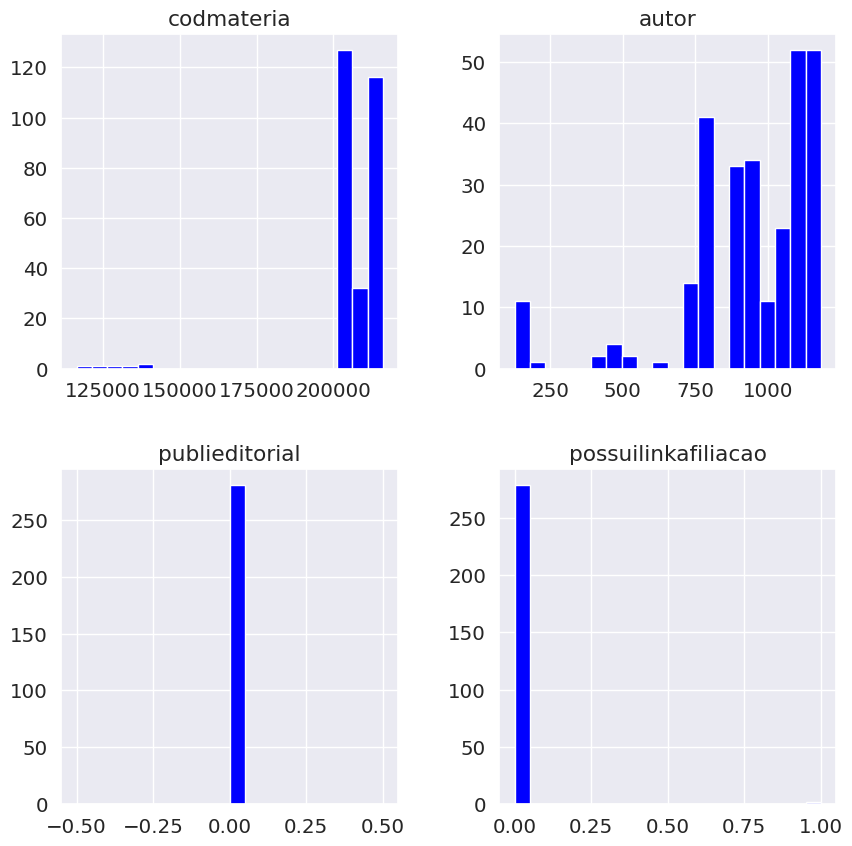

In [ ]:
# Plota histograma do dataframe 'df_dbo_materias'
sns.set(font_scale=1.3, rc={'figure.figsize':(10,10)})
eixo = df_dbo_materias.hist(bins=20, color='blue')

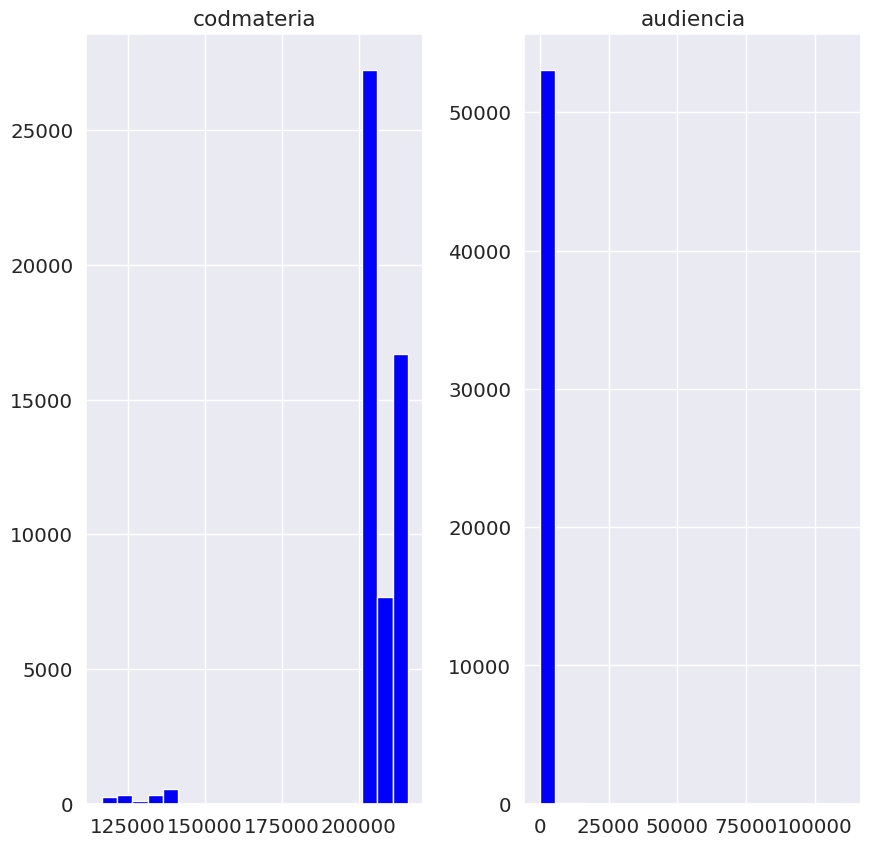

In [ ]:
# Plota histograma do dataframe 'df_dbo_views'
sns.set(font_scale=1.3, rc={'figure.figsize':(10,10)})
eixo = df_dbo_views.hist(bins=20, color='blue')

In [ ]:
# Usando apply com uma função lambda para tranformar a coluna 'tipo' em binário
df_dbo_materias['tipo'] = df_dbo_materias['tipo'].apply(lambda x: 1 if x == 'Hard News' else (0 if x == 'Evergreen' else x))

print(df_dbo_materias)

     codmateria                 data_pub  \
0        116360  2020-11-06 14:13:24.573   
1        124744  2020-11-25 09:51:44.880   
2        129678  2020-11-04 00:00:00.000   
3        134805  2020-11-06 14:02:08.347   
4        137827  2021-01-19 16:45:14.100   
..          ...                      ...   
276      215853  2021-04-24 10:00:01.003   
277      215896  2021-04-21 17:00:01.450   
278      215923  2021-04-21 15:00:01.543   
279      216006  2021-04-25 10:00:01.593   
280      216127  2021-04-24 19:00:01.350   

                                                titulo  autor            tag  \
0    Entenda o que é ransomware: o malware que sequ...    547      Segurança   
1    Cashback: o que é e como funciona esse método ...    632        Mercado   
2    Associação consegue liminar que restringe aume...    523        Mercado   
3    A história da urna eletrônica e das eleições n...    128        Mercado   
4    Não gosta e quer passar longe? Aprenda como ev...    759       Sof

In [ ]:
# Combinando as tabelas usando a coluna chave
df_merged = pd.merge(df_dbo_materias, df_dbo_views, on='codmateria')

In [ ]:
# Exibindo informações sobre o DataFrame
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53140 entries, 0 to 53139
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   codmateria           53140 non-null  int64 
 1   data_pub             53140 non-null  object
 2   titulo               53140 non-null  object
 3   autor                53140 non-null  int64 
 4   tag                  53140 non-null  object
 5   publieditorial       53140 non-null  int64 
 6   possuilinkafiliacao  53140 non-null  int64 
 7   tipo                 53140 non-null  int64 
 8   ï»¿data_audiencia    53140 non-null  object
 9   audiencia            53140 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 4.1+ MB


<Axes: xlabel='audiencia', ylabel='tipo'>

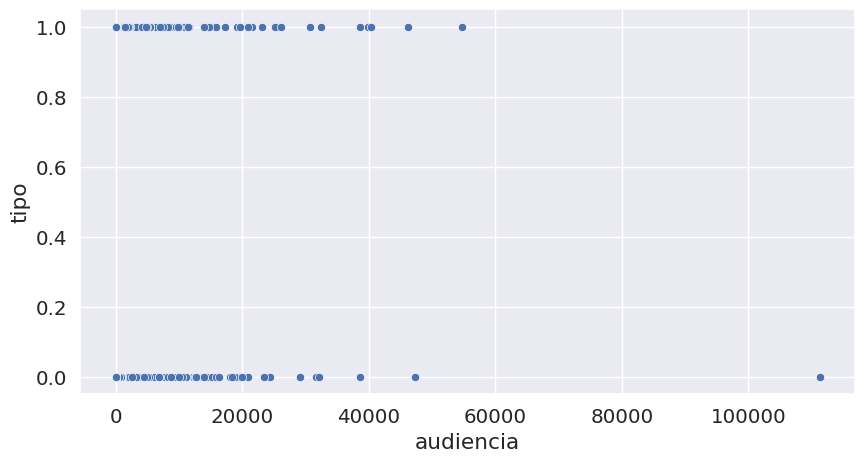

In [ ]:
# Plota um gráfico de dispersão para 'audiencia' vs 'tipo'
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_merged, x='audiencia', y='tipo')

In [ ]:
# Filtra colunas específicas do DataFrame
df_merged=df_merged[['codmateria', 'data_pub', 'titulo', 'tag', 'autor', 'publieditorial', 'possuilinkafiliacao', 'audiencia', 'tipo', 'ï»¿data_audiencia']]


In [ ]:
df_merged

,codmateria,data_pub,titulo,tag,autor,publieditorial,possuilinkafiliacao,audiencia,tipo,ï»¿data_audiencia
0,116360,2020-11-06 14:13:24.573,Entenda o que é ransomware: o malware que sequ...,Segurança,547,0,0,1,1,02/10/2020
1,116360,2020-11-06 14:13:24.573,Entenda o que é ransomware: o malware que sequ...,Segurança,547,0,0,2,1,08/10/2020
2,116360,2020-11-06 14:13:24.573,Entenda o que é ransomware: o malware que sequ...,Segurança,547,0,0,1,1,10/10/2020
3,116360,2020-11-06 14:13:24.573,Entenda o que é ransomware: o malware que sequ...,Segurança,547,0,0,1,1,12/10/2020
4,116360,2020-11-06 14:13:24.573,Entenda o que é ransomware: o malware que sequ...,Segurança,547,0,0,1,1,19/10/2020
...,...,...,...,...,...,...,...,...,...,...
53135,216127,2021-04-24 19:00:01.350,Google Groups: como fazer um grupo na ferramenta,Internet,1124,0,0,4,0,15/08/2021
53136,216127,2021-04-24 19:00:01.350,Google Groups: como fazer um grupo na ferramenta,Internet,1124,0,0,14,0,16/08/2021
53137,216127,2021-04-24 19:00:01.350,Google Groups: como fazer um grupo na ferramenta,Internet,1124,0,0,7,0,17/08/2021
53138,216127,2021-04-24 19:00:01.350,Google Groups: como fazer um grupo na ferramenta,Internet,1124,0,0,4,0,18/08/2021


In [ ]:
# Conta a frequência de valores na coluna 'tag' do dataframe 'df_dbo_materias'
df_dbo_materias["tag"].value_counts()

,count
tag,
Voxel,50
Software,44
Internet,40
Mercado,24
Ciência,24
Minha Série,24
Produto,21
Cultura Geek,18
Mobilidade Urbana/Smart Cities,11


In [ ]:
# Aplica mapeamento de valores específicos na coluna 'tag' do dataframe 'df_merged'
df_merged['tag'] = df_merged['tag'].apply(lambda x: 50 if x == 'Voxel' else
                                                 44 if x == 'Software' else
                                                 40 if x == 'Internet' else
                                                 24 if x == 'Mercado' else
                                                 25 if x == 'Ciência' else
                                                 26 if x == 'Minha Série' else
                                                 21 if x == 'Produto' else
                                                 18 if x == 'Cultura Geek' else
                                                 11 if x == 'Mobilidade Urbana/Smart Cities' else
                                                 10 if x == 'Redes Sociais' else
                                                  8 if x == 'Segurança' else
                                                  8 if x == 'Dispositivos Móveis' else x)


In [ ]:
df_merged

,codmateria,data_pub,titulo,tag,autor,publieditorial,possuilinkafiliacao,audiencia,tipo,ï»¿data_audiencia
0,116360,2020-11-06 14:13:24.573,Entenda o que é ransomware: o malware que sequ...,8,547,0,0,1,1,02/10/2020
1,116360,2020-11-06 14:13:24.573,Entenda o que é ransomware: o malware que sequ...,8,547,0,0,2,1,08/10/2020
2,116360,2020-11-06 14:13:24.573,Entenda o que é ransomware: o malware que sequ...,8,547,0,0,1,1,10/10/2020
3,116360,2020-11-06 14:13:24.573,Entenda o que é ransomware: o malware que sequ...,8,547,0,0,1,1,12/10/2020
4,116360,2020-11-06 14:13:24.573,Entenda o que é ransomware: o malware que sequ...,8,547,0,0,1,1,19/10/2020
...,...,...,...,...,...,...,...,...,...,...
53135,216127,2021-04-24 19:00:01.350,Google Groups: como fazer um grupo na ferramenta,40,1124,0,0,4,0,15/08/2021
53136,216127,2021-04-24 19:00:01.350,Google Groups: como fazer um grupo na ferramenta,40,1124,0,0,14,0,16/08/2021
53137,216127,2021-04-24 19:00:01.350,Google Groups: como fazer um grupo na ferramenta,40,1124,0,0,7,0,17/08/2021
53138,216127,2021-04-24 19:00:01.350,Google Groups: como fazer um grupo na ferramenta,40,1124,0,0,4,0,18/08/2021


In [ ]:
# Converte a coluna 'data_pub' para o formato de data
df_merged['data_pub']=pd.to_datetime(df_merged['data_pub'])

In [ ]:
# Cria uma nova coluna 'mes_pub' com o mês de publicação extraído de 'data_pub'
df_merged['mes_pub']=df_merged['data_pub'].dt.month

In [ ]:
df_merged

,codmateria,data_pub,titulo,tag,autor,publieditorial,possuilinkafiliacao,audiencia,tipo,ï»¿data_audiencia,mes_pub
0,116360,2020-11-06 14:13:24.573,Entenda o que é ransomware: o malware que sequ...,8,547,0,0,1,1,02/10/2020,11
1,116360,2020-11-06 14:13:24.573,Entenda o que é ransomware: o malware que sequ...,8,547,0,0,2,1,08/10/2020,11
2,116360,2020-11-06 14:13:24.573,Entenda o que é ransomware: o malware que sequ...,8,547,0,0,1,1,10/10/2020,11
3,116360,2020-11-06 14:13:24.573,Entenda o que é ransomware: o malware que sequ...,8,547,0,0,1,1,12/10/2020,11
4,116360,2020-11-06 14:13:24.573,Entenda o que é ransomware: o malware que sequ...,8,547,0,0,1,1,19/10/2020,11
...,...,...,...,...,...,...,...,...,...,...,...
53135,216127,2021-04-24 19:00:01.350,Google Groups: como fazer um grupo na ferramenta,40,1124,0,0,4,0,15/08/2021,4
53136,216127,2021-04-24 19:00:01.350,Google Groups: como fazer um grupo na ferramenta,40,1124,0,0,14,0,16/08/2021,4
53137,216127,2021-04-24 19:00:01.350,Google Groups: como fazer um grupo na ferramenta,40,1124,0,0,7,0,17/08/2021,4
53138,216127,2021-04-24 19:00:01.350,Google Groups: como fazer um grupo na ferramenta,40,1124,0,0,4,0,18/08/2021,4


In [ ]:
# Reorganiza e filtra colunas no dataframe 'df_merged'
df_merged=df_merged[['codmateria', 'data_pub', 'titulo', 'mes_pub', 'tag', 'autor', 'publieditorial', 'possuilinkafiliacao', 'audiencia', 'tipo', 'ï»¿data_audiencia']]


In [ ]:
# Seleciona um conjunto de características para modelagem
caracteristica = df_merged.iloc[:,3:9].values

# Seleciona a variável alvo para modelagem
previsor = df_merged.iloc[:,9:10].values

In [ ]:
previsor

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
caracteristica

array([[  11,    8,  547,    0,    0,    1],
       [  11,    8,  547,    0,    0,    2],
       [  11,    8,  547,    0,    0,    1],
       ...,
       [   4,   40, 1124,    0,    0,    7],
       [   4,   40, 1124,    0,    0,    4],
       [   4,   40, 1124,    0,    0,    1]])

In [ ]:
# Importa função para dividir os dados em treino e teste
from sklearn.model_selection import train_test_split

# Divide os dados em conjuntos de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(caracteristica,
                                                        previsor,
                                                        test_size=0.20)

In [ ]:
# Importa o modelo de regressão logística
from sklearn.linear_model import LogisticRegression

Funcao_Logistica = LogisticRegression() # Instancia o modelo de regressão logística
Funcao_Logistica.fit( x_treino, y_treino.ravel() ) # Treina o modelo usando os dados de treino

LogisticRegression()

In [ ]:
# Faz previsões usando os dados de teste
Previsoes = Funcao_Logistica.predict(x_teste)

In [ ]:
Previsoes

array([0, 1, 1, ..., 0, 0, 1])

In [ ]:
y_teste

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
# Importa a função para calcular a matriz de confusão
from sklearn.metrics import confusion_matrix

In [ ]:
# Calcula a matriz de confusão para as previsões
confusion_matrix(y_teste, Previsoes)

array([[3732, 1853],
       [  49, 4994]])

In [ ]:
# Importa a função para gerar o relatório de classificação
from sklearn.metrics import classification_report

# Imprime o relatório de classificação
print(classification_report(y_teste, Previsoes))

              precision    recall  f1-score   support

           0       0.99      0.67      0.80      5585
           1       0.73      0.99      0.84      5043

    accuracy                           0.82     10628
   macro avg       0.86      0.83      0.82     10628
weighted avg       0.86      0.82      0.82     10628



In [ ]:
Previsoes = Funcao_Logistica.predict(x_teste) # Faz previsões com o modelo treinado
Previsao_proba = Funcao_Logistica.predict_proba(x_teste)[:, 1] # Calcula as probabilidades das previsões

In [ ]:
# Importa métricas adicionais
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [ ]:
# Calcular métricas
accuracy = accuracy_score(y_teste, Previsoes) # Calcula a acurácia do modelo
conf_matrix = confusion_matrix(y_teste, Previsoes) # Calcula a matriz de confusão
class_report = classification_report(y_teste, Previsoes) # Gera o relatório de classificação
roc_auc = roc_auc_score(y_teste, Previsao_proba) # Calcula a área sob a curva ROC

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)
print(f'ROC AUC Score: {roc_auc}')


Accuracy: 0.8210387655250282
Confusion Matrix:
[[3732 1853]
 [  49 4994]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.67      0.80      5585
           1       0.73      0.99      0.84      5043

    accuracy                           0.82     10628
   macro avg       0.86      0.83      0.82     10628
weighted avg       0.86      0.82      0.82     10628

ROC AUC Score: 0.7553056959920865


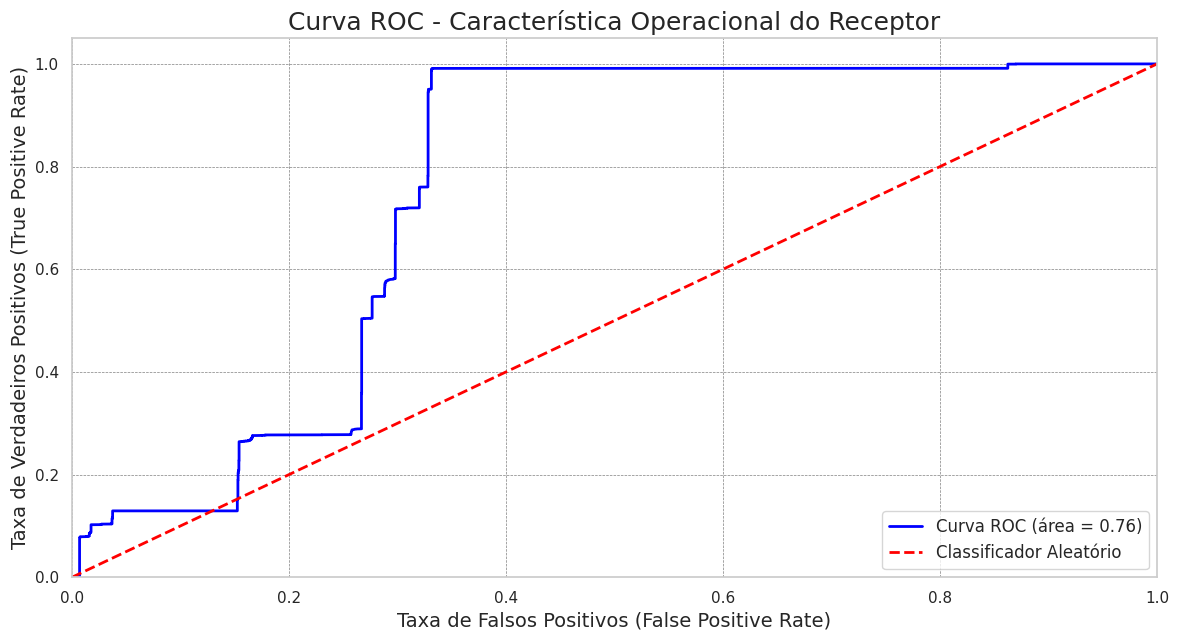

In [ ]:
# Calcular fpr, tpr e thresholds para a Curva ROC
fpr, tpr, thresholds = roc_curve(y_teste, Previsao_proba)
roc_auc = roc_auc_score(y_teste, Previsao_proba)

# Configurar o estilo do seaborn
sns.set(style="whitegrid")

# Plotar a Curva ROC
plt.figure(figsize=(14, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Classificador Aleatório')

# Adicionar anotações e elementos gráficos para melhorar a visualização
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (False Positive Rate)', fontsize=14)
plt.ylabel('Taxa de Verdadeiros Positivos (True Positive Rate)', fontsize=14)
plt.title('Curva ROC - Característica Operacional do Receptor', fontsize=18)
plt.legend(loc="lower right", fontsize=12)

# Adicionar uma grade para melhor visualização
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Mostrar o gráfico
plt.show()